<a href="https://colab.research.google.com/github/TanuRajput110/NETFLIX-/blob/main/Netflix.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**NETFLIX DATASET**

##**1---Preprocessing The Data**

In [196]:
#import drive into collab
from google.colab import drive
drive.mount('/content/gdrive')

Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).


In [197]:
#import libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [198]:
#read csv and store it into a variable
df=pd.read_csv('/content/gdrive/MyDrive/projects and csv/netflix_titles.csv.zip')

In [199]:
#top 5 rows of dataset
df.head()

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,NaN,United States,"September 25, 2021",2020,PG-13,90 min,Documentaries,"As her father nears the end of his life, filmm..."
1,s2,TV Show,Blood & Water,NaN,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",South Africa,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, TV Dramas, TV Mysteries","After crossing paths at a party, a Cape Town t..."
2,s3,TV Show,Ganglands,Julien Leclercq,"Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabi...",NaN,"September 24, 2021",2021,TV-MA,1 Season,"Crime TV Shows, International TV Shows, TV Act...",To protect his family from a powerful drug lor...
3,s4,TV Show,Jailbirds New Orleans,NaN,NaN,NaN,"September 24, 2021",2021,TV-MA,1 Season,"Docuseries, Reality TV","Feuds, flirtations and toilet talk go down amo..."
4,s5,TV Show,Kota Factory,NaN,"Mayur More, Jitendra Kumar, Ranjan Raj, Alam K...",India,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, Romantic TV Shows, TV ...",In a city of coaching centers known to train I...


In [200]:
#information of dataframe
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8807 entries, 0 to 8806
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   show_id       8807 non-null   object
 1   type          8807 non-null   object
 2   title         8807 non-null   object
 3   director      6173 non-null   object
 4   cast          7982 non-null   object
 5   country       7976 non-null   object
 6   date_added    8797 non-null   object
 7   release_year  8807 non-null   int64 
 8   rating        8803 non-null   object
 9   duration      8804 non-null   object
 10  listed_in     8807 non-null   object
 11  description   8807 non-null   object
dtypes: int64(1), object(11)
memory usage: 825.8+ KB


In [201]:
#shape of dataframe
df.shape

(8807, 12)

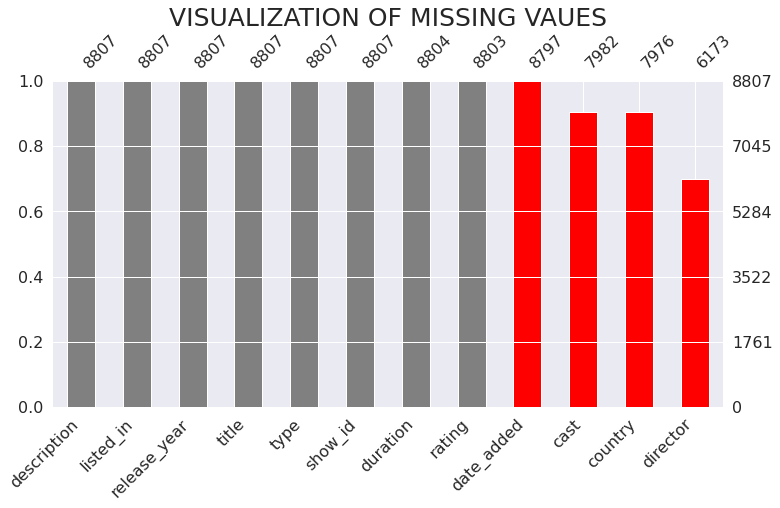

In [202]:
#check for missing values
import missingno
color = ['grey','grey','grey','grey','grey','grey','grey','grey','red','red','red','red']
missingno.bar(df,fontsize =16, color = color, sort = 'descending', figsize = (12,6))
plt.title("VISUALIZATION OF MISSING VAUES",fontsize=25)
plt.show()

Most of the Values are Missing From Director Column and some of in Cast,Country and Date column


Let's impute the missing values:

In [203]:
# handling missing values
df['director'] = df['director'].fillna('NoDataAvailable')
df['country'] = df['country'].fillna(df['country'].mode()[0])
df['cast'] = df['cast'].fillna('NoDataAvailable')
df['date_added'] = df['date_added'].fillna(df['date_added'].mode()[0])
df['rating'] = df['rating'].fillna(df['rating'].mode()[0])
print('count of values')
print(df.isna().sum())

count of values
show_id         0
type            0
title           0
director        0
cast            0
country         0
date_added      0
release_year    0
rating          0
duration        3
listed_in       0
description     0
dtype: int64


In [204]:
#duplicate value
df.duplicated().sum()

0

The dataset has no Duplicated Values

In [205]:
#extract year and month
df["year"]=pd.DatetimeIndex(df["date_added"]).year
df["month"]=pd.DatetimeIndex(df["date_added"]).month

In [206]:
#unique value in python
df['type'].unique()

array(['Movie', 'TV Show'], dtype=object)

In [207]:
#make a new column of rating by replacing values
atings_ages = {
    'TV-PG': 'Older Kids',
    'TV-MA': 'Adults',
    'TV-Y7-FV': 'Older Kids',
    'TV-Y7': 'Older Kids',
    'TV-14': 'Teens',
    'R': 'Adults',
    'TV-Y': 'Kids',
    'NR': 'Adults',
    'PG-13': 'Teens',
    'TV-G': 'Kids',
    'PG': 'Older Kids',
    'G': 'Kids',
    'UR': 'Adults',
    'NC-17': 'Adults'
}
df["ratings_ages"]=df["rating"].replace(ratings_ages)

In [192]:
#let's see dataframe after all changes
df.head()

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description,ratings_ages
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,NaN,United States,"September 25, 2021",2020,PG-13,90 min,Documentaries,"As her father nears the end of his life, filmm...",Teens
1,s2,TV Show,Blood & Water,NaN,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",South Africa,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, TV Dramas, TV Mysteries","After crossing paths at a party, a Cape Town t...",Adults
2,s3,TV Show,Ganglands,Julien Leclercq,"Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabi...",NaN,"September 24, 2021",2021,TV-MA,1 Season,"Crime TV Shows, International TV Shows, TV Act...",To protect his family from a powerful drug lor...,Adults
3,s4,TV Show,Jailbirds New Orleans,NaN,NaN,NaN,"September 24, 2021",2021,TV-MA,1 Season,"Docuseries, Reality TV","Feuds, flirtations and toilet talk go down amo...",Adults
4,s5,TV Show,Kota Factory,NaN,"Mayur More, Jitendra Kumar, Ranjan Raj, Alam K...",India,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, Romantic TV Shows, TV ...",In a city of coaching centers known to train I...,Adults


# ANALYSIS

###***01. HOW CONTENT IS DISTRIBUTED OVER TYPE AND RATINGS_AGES.***

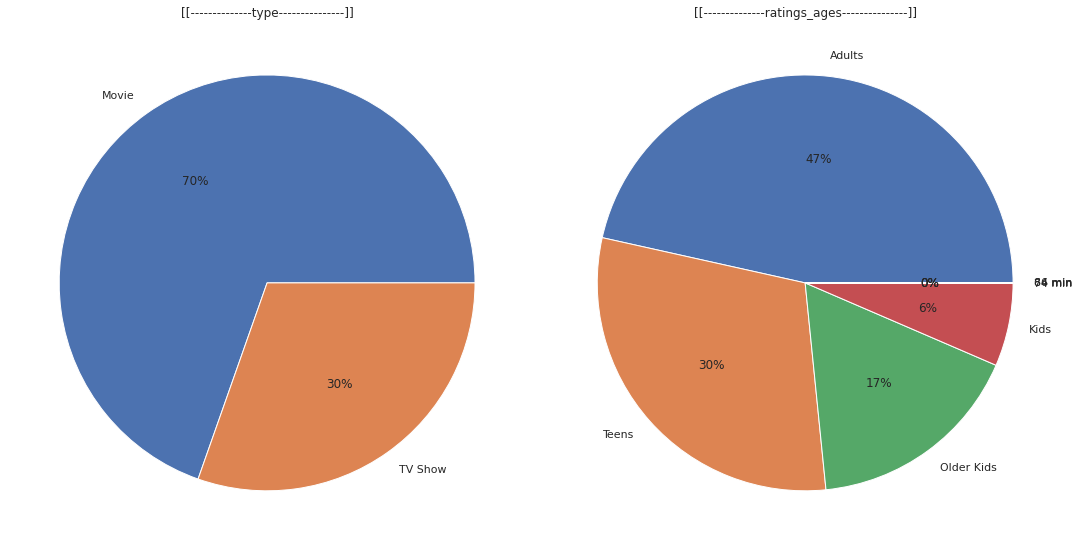

In [219]:
# Distribution of type and rating ages
columns = ['type','ratings_ages']
n = 1
plt.figure(figsize=(30,30))

for i in columns:
  plt.subplot(4,4,n)
  n = n+1
  plt.pie(df[i].value_counts(),labels=df[i].value_counts().keys().to_list(),autopct='%.0f%%')
  plt.title(f"[[--------------{i}---------------]]")
  #sns.pointplot(df[column])
  plt.tight_layout()
  

**--------------------from 1st pie charts-----,we can observe that,count of movies are higher than count of TV shows on NETFLIX.---------------**



**-------------------from 2nd pie chart,-------we can observe that rating on NETFLIX are greater by adults .--------------**

###***02.TOTAL COUNT OF  MOVIES & TV-SHOWS***

In [214]:
#total shows and movies
co=df['show_id'].count().sum()
print(f"total count of show and movies----{co}")
#split show and movies
dff=df.groupby('type')['show_id'].count().reset_index()
print(dff)

total count of show and movies----8807
      type  show_id
0    Movie     6131
1  TV Show     2676


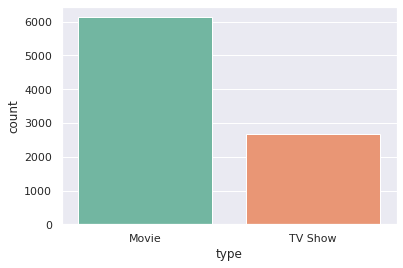

In [216]:

sns.set(style="darkgrid")
sns.countplot(x="type", data=df, palette="Set2")

**------------------------------count of movies are larger than count of TV shows.------------------**

###***03.COUNTRY WITH THE HIGHEST COUNT FOR EACH TYPE.***

In [230]:
#count of each country for type
countries=pd.crosstab(df["country"],["type"]).sort_values(by="type",ascending=True)[-10:].reset_index()
countries

col_0,country,type
0,Egypt,106
1,Mexico,110
2,France,124
3,Spain,145
4,Canada,181
5,South Korea,199
6,Japan,245
7,United Kingdom,419
8,India,972
9,United States,3649


Text(0.5, 1.0, 'TOP COUNTRIES WITH HIGHEST NUMBER OF MOVIES AND SHOWS')

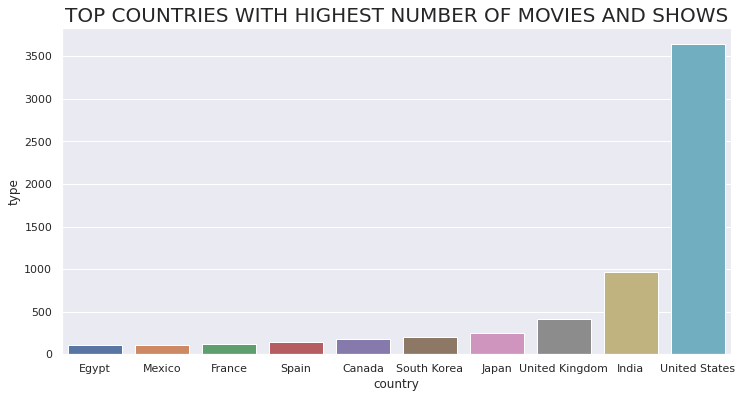

In [231]:

plt.figure(figsize=(12,6))
ax=sns.barplot(x=countries["country"],y=countries["type"] )
plt.title("TOP COUNTRIES WITH HIGHEST NUMBER OF MOVIES AND SHOWS",fontsize=20)

count of country per each type------TV Show
            index  country
0   United States     1151
1  United Kingdom      213
2           Japan      169
3     South Korea      158
4           India       79
count of country per each type------Movie
            index  country
0   United States     2498
1           India      893
2  United Kingdom      206
3          Canada      122
4           Spain       97


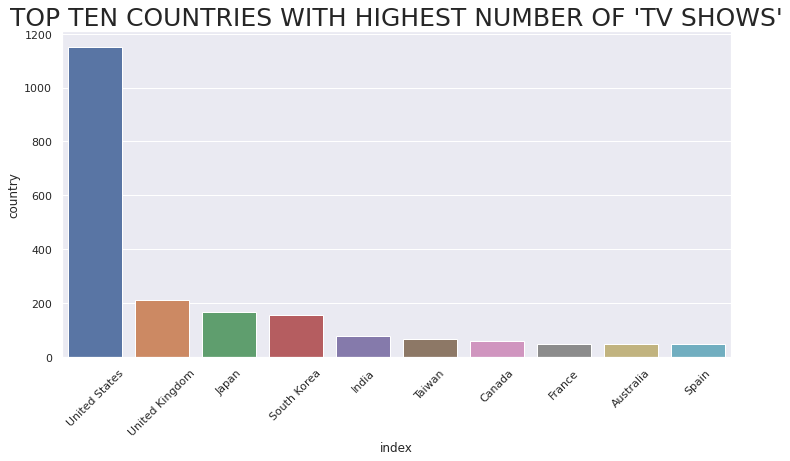

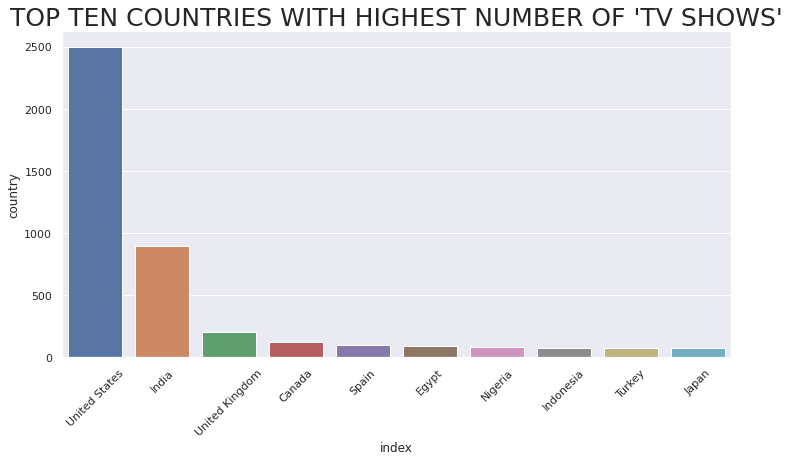

In [232]:
#country with highest no. of movies and tv shows
col=['TV Show','Movie']
for i in col:
  movies=df[df["type"]==i]["country"].value_counts().reset_index()[0:10]
  print(f"count of country per each type------{i}")
  print(movies.head())
  plt.figure(figsize=(12,6))
  plt.title("TOP TEN COUNTRIES WITH HIGHEST NUMBER OF 'TV SHOWS'",fontsize=25)
  sns.barplot(x=movies["index"],y=movies["country"])
  
  plt.xticks(rotation =45)

**---------OBSERVATION FROM ABOVE BARPLOTS-----------**

**1.US has the highest count for each type on NETFLIX.**

**2.US has total count of 3649,amongst them 1151 are TV shows and 2498 are movies.**

**-------------------INDIA has total count of type -- [972]..from which 79 are TV shows and 893 are movie---------------------------.**

###***04.WHICH AGEGROUP RATE THE NETFLIX MOST.***

Text(0.5, 1.0, 'TOP ratings_ages in netflix ')

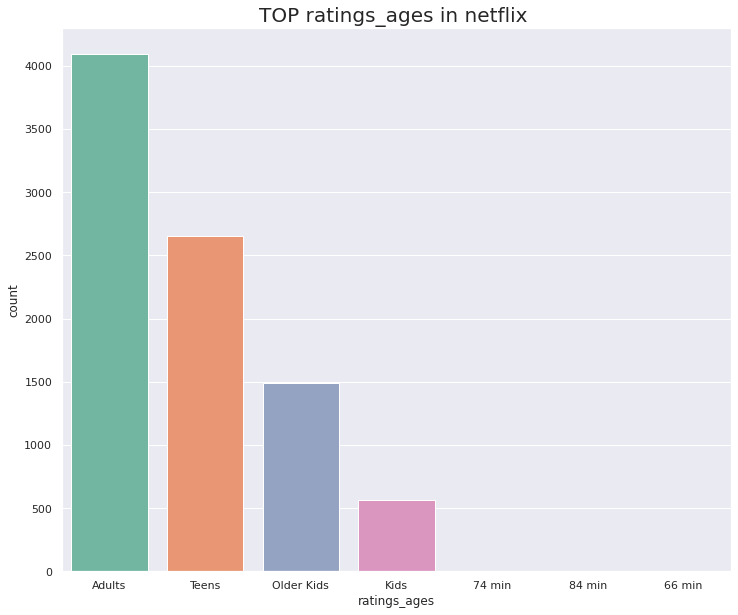

In [235]:
plt.figure(figsize=(12,10))
sns.set(style="darkgrid")
sns.countplot(x="ratings_ages", data=df, palette="Set2", order=df["ratings_ages"].value_counts().index[0:15])
plt.title("TOP ratings_ages in netflix ",fontsize=20)

**--------------Adults agegroup gave largest rating on NETFLIX-------------------**

###***05.COUNTRY WHICH RELEASE LARGEST AMOUNT OF  SHOWS AND MOVIE ON NETFLIX.***

Text(0.5, 1.0, 'COUNTRY WITH HIGHEST COUNT ON NETFLIX')

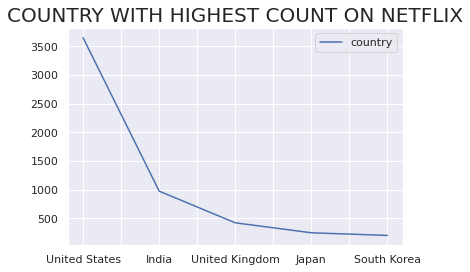

In [233]:
pd.DataFrame(df['country'].value_counts().sort_values(ascending=False).head()).plot()
plt.title("COUNTRY WITH HIGHEST COUNT ON NETFLIX",fontsize=20)


**------------US has largest amount of content on NETFLIX----------------**

###***06.WHICH YEAR HAVING HIGHEST RELEASE OF MOVIE AND TV SHOWS.***

2018    1147
2017    1032
2019    1030
2020     953
2016     902
Name: release_year, dtype: int64
AxesSubplot(0.125,0.125;0.775x0.755)


Text(0.5, 1.0, 'YEAR HAVING HIGHEST RELEASE OF MOVIE AND SHOWS')

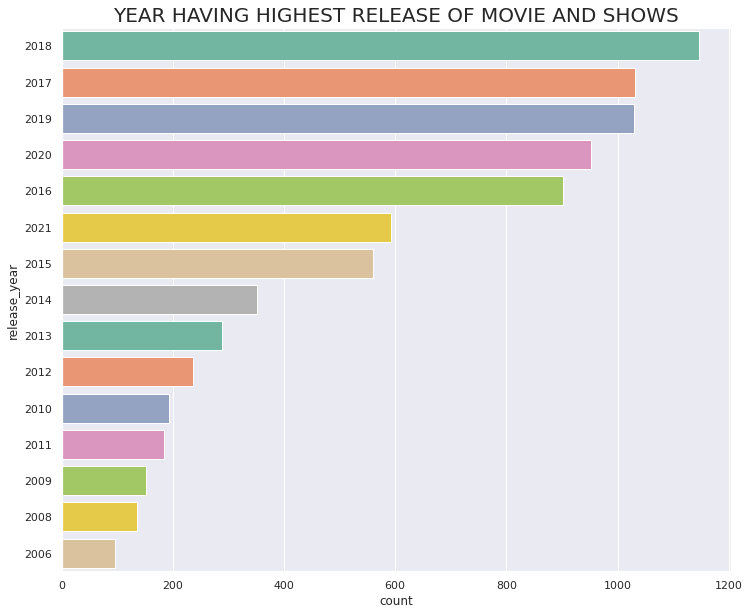

In [239]:
print(df['release_year'].value_counts().head())
plt.figure(figsize=(12,10))
sns.set(style="darkgrid")
print(sns.countplot(y="release_year", data=df, palette="Set2" , order=df['release_year'].value_counts().index[0:15]))
plt.title("YEAR HAVING HIGHEST RELEASE OF MOVIE AND SHOWS",fontsize=20)

**------------------IN 2018,release count are 1147.which is highest till 2018.---------------------**

###***07.IN EACH YEAR ,WHICH TYPE HAVING LARGEST ADDITION .***

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning:

Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.



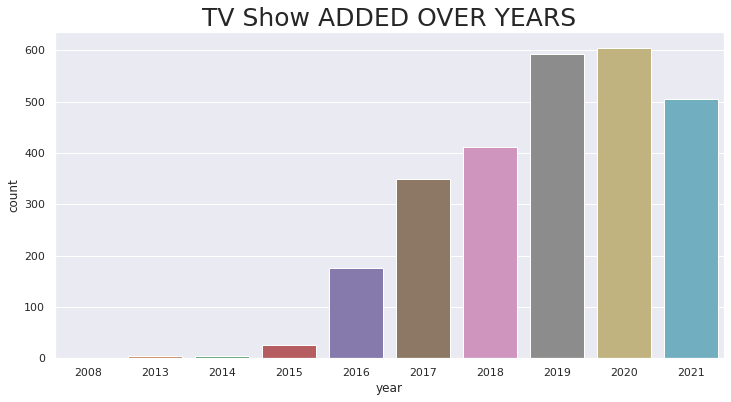

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning:

Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.



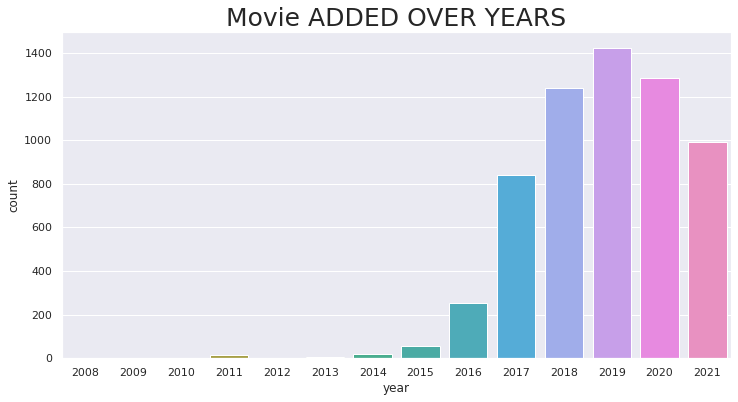

In [ ]:
for i in col:
   
    c=df[df["type"]==i]
    plt.figure(figsize=(12,6))
    sns.countplot(c["year"])
    plt.title(f"{i} ADDED OVER YEARS",fontsize=25)
    plt.show()




**----------------------------IN 2020,TV SHOWS added  most on NETFLIX-------------------------------**


**-------------------IN 2019,MOVIE added  most on NETFLIX.------------------**

###***08.WHICH YEAR HAVING HIGHEST no. of content.***

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning:

Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.



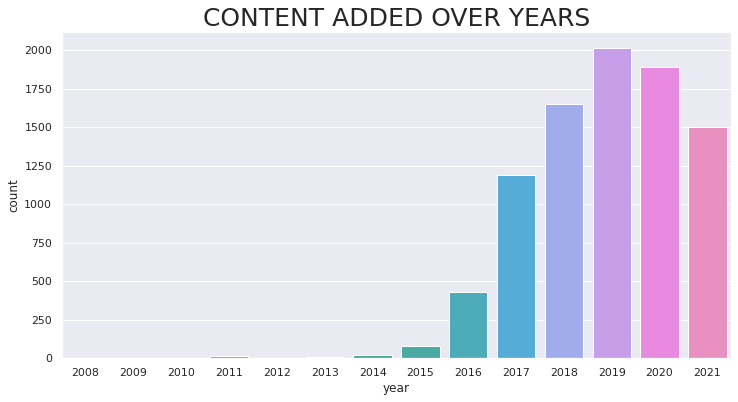

In [ ]:
plt.figure(figsize=(12,6))
sns.countplot(df["year"])
plt.title("CONTENT ADDED OVER YEARS",fontsize=25)
plt.show()

**---------2019 have the highest num of content added on NETFLIX.----------**

###***08.RATING COUNTS  OF  MOVIE AND TV SHOWS ON NETFLIX.***

In [242]:
#total rating count on netflix
px.pie(df,names="ratings_ages",values=df.index)

In [243]:
#total counts done by ratongs_ages for movies
movies=df[df["type"]=="Movie"]
tv=df[df["type"]=="TV Show"]
px.pie(movies,names="ratings_ages",values=movies.index,title="Type of content present in movies")

In [244]:
##total counts done by ratongs_ages for TV SHOWS
px.pie(tv,names="ratings_ages",values=tv.index,title="Type of content present in Tv shows")

**------------observation:**

**-----------------adults rate the NETFLIX  most_________________**

**total ratings on netflix by adults---45.8%**

**from which,for movie are-48.--3%**

**for tv shows are ---39%**


**this shows that adults like to watch movie the most.**

###**CONCLUSION:::**

1).....count of movies are higher than count of TV shows on NETFLIX.

2)......Adults rating are most on NETFLIX.they like to watch mostlt movies(45.8%).

3)......-count of movies are larger than count of TV shows.

4)......US has the highest count for each type on NETFLIX.

5).......US has total count of 3649,amongst them 1151 are TV shows and 2498 are movies.

6)........INDIA has total count of type -- [972]..from which 79 are TV shows and 893 are movie-

7)........US is on top 1 which have largest amount of content on netflix. and INDIA is on  second.------- US=3649----------  India=972

8).......-IN 2018,release count are 1147.which is highest till 2018.

9)........IN 2020,TV SHOWS added most on NETFLIX.and IN 2019,MOVIE added most on NETFLIX.AND 2019 have the highest num of content added on NETFLIX 